# Validation numérique des résultas

Validation du schéma numérique pour la résolution du problème suivant par différences finies :
\begin{cases}
    -\frac{d}{dx}\left( a(x) \frac{du}{dx} \right) = f(x), & \text{pour } x \in [a,b] \\
    u(a) = u(b) = 0,
\end{cases}
 

In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
%reload_ext autoreload
%autoreload 2

In [104]:
import code_python as homogenization

Les fonctions a tester :
- $u(x)=x(1-x)$ pour tester la convergence exacte(solution exacte) pour les polynome d'ordre 2
- $u(x) = sin(\pi x)$ pour tester l'ordre du schéma
    

In [119]:
def u_ex(x):
    return x*(1-x)
    #return np.sin(np.pi*x)
    #return np.zeros(np.size(x))

def f(x,eps):
    return +4+2/eps*np.pi*np.sin(2*np.pi*x/eps) + 2*np.cos(2*np.pi*x/eps) - 4*x*np.pi/eps*np.sin(2*np.pi*x/eps)
    return 2 *(np.pi**2)*np.sin(np.pi*x) + (np.pi**2)*np.sin(np.pi*x)*np.cos(2*np.pi*x/eps) + 2*(np.pi**2)/eps*np.cos(np.pi*x)*np.sin(2*np.pi*x/eps)
    #return np.sin(x)*(1-2*x)+2*np.cos(x)
    #return np.pi*(np.cos(np.pi*x)*np.sin(x)+np.pi*np.sin(np.pi*x)*np.cos(x))
    #return np.zeros(np.size(x))
    
    
    #return np.pi*np.sin(np.pi*x)*(1-2*x)+2*np.cos(np.pi*x)    #ne marche pas
    #return 2*np.pi**2*np.cos(np.pi*x)*np.sin(np.pi*x)

def a_eps(x,eps):
    #return np.cos(x)
    #return np.cos(np.pi*x/2)
    return 2 + np.cos(2*np.pi*x/eps)

def d_a_eps(x,eps):
    return -2*np.pi/eps*np.sin(2*np.pi*x/eps)

Posons $a=0$ et $b=1$

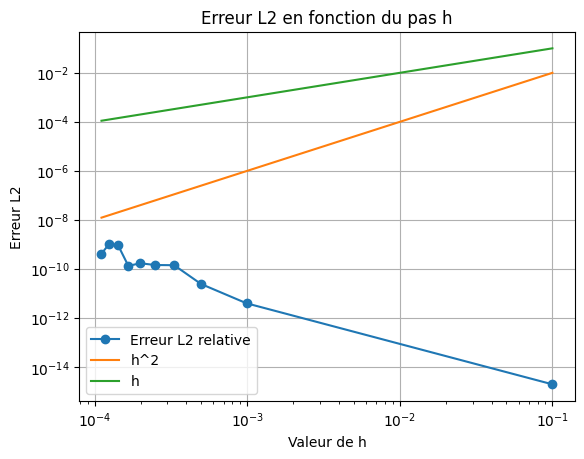

In [126]:
a = 0
b = 1
eps = 1#10 **(-1)
n_initial = 10
n = 10000
error_list = []
h_value = []
for i in range(n_initial,n,1000):
    X = np.linspace(a,b,i+1)
    A_eps = a_eps(X,eps)
    dA_eps = d_a_eps(X,eps)
    h = abs(X[1]-X[0])
    F = f(X,eps)
    U_ex = u_ex(X)
    U_est = homogenization.DF_solve_temp(i,h,F,A_eps,dA_eps)
    err = np.linalg.norm(U_ex - U_est)
    error_list.append(err)
    h_value.append(h)
    #print("Erreur L2 :", err)
    #plt.plot(X,U_est,label='Estimation')
    #plt.plot(X,U_ex,label='Exact')
    #plt.show()
    
fig = plt.figure()
ax = plt.subplot()
ax.loglog(h_value, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(h_value, [x**2 for x in h_value], label='h^2')
ax.loglog(h_value, h_value, label='h')
ax.legend()

plt.xlabel('Valeur de h')
plt.ylabel('Erreur L2')
plt.title('Erreur L2 en fonction du pas h')
plt.grid(True)
plt.show()

Regardons pour $a_\epsilon$ un créneau et $f=1+x$ la solution homogénéisé non corrigé en 1D et la solution aux différences finies

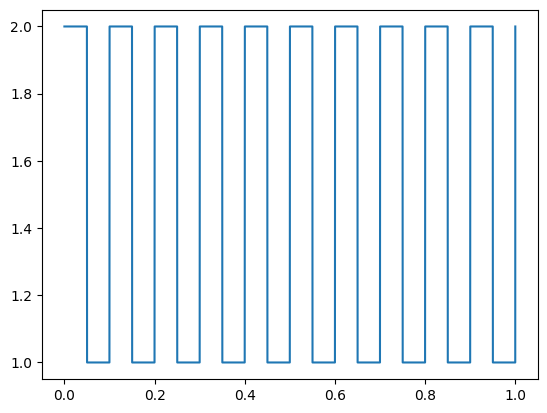

In [95]:
eps = 0.1
def a_eps(x,eps):
    return np.where((x/eps)%1 < 0.5,1,0)+1
def f(x):
    return 2+x
plt.plot(X,a_eps(X,eps))

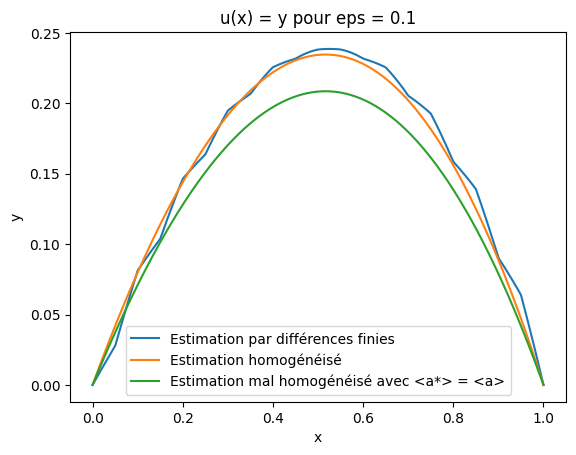

In [96]:
a = 0
b = 1
n = 100000
X = np.linspace(a,b,n+1)
A_eps = a_eps(X,eps)
dA_eps = d_a_eps(X,eps)
h = abs(X[1]-X[0])
F = f(X)

U_est = homogenization.DF_solve(n,h,F,A_eps)
a_star = homogenization.compute_a_star(A_eps)
a_mean = homogenization.mean_a(A_eps)
U_homo = homogenization.DF_solve_laplacien(a_star,n,h,F)
U_homo_test = homogenization.DF_solve_laplacien(a_mean,n,h,F)


fig = plt.figure()
ax = plt.subplot()

ax.plot(X,U_est,label='Estimation par différences finies')
ax.plot(X,U_homo,label='Estimation homogénéisé')
ax.plot(X,U_homo_test,label='Estimation mal homogénéisé avec <a*> = <a>')
ax.legend()

plt.xlabel('x')
plt.ylabel('y')
plt.title('u(x) = y pour eps = 0.1')
plt.show()

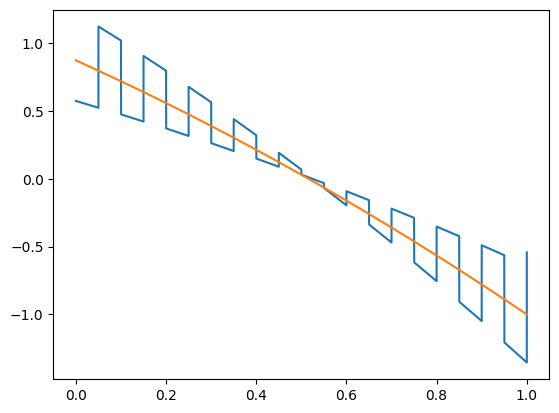

In [97]:
Uprime = homogenization.compute_a_derive(U_est,h)
plt.plot(X,Uprime)
Uprimeh = homogenization.compute_a_derive(U_homo,h)
plt.plot(X,Uprimeh)

# On fait tendre $\epsilon$ vers 0 
Remarquons qu'il n'y a pas de convergence forte dans $H^1$ mais suelement dans $L^2$

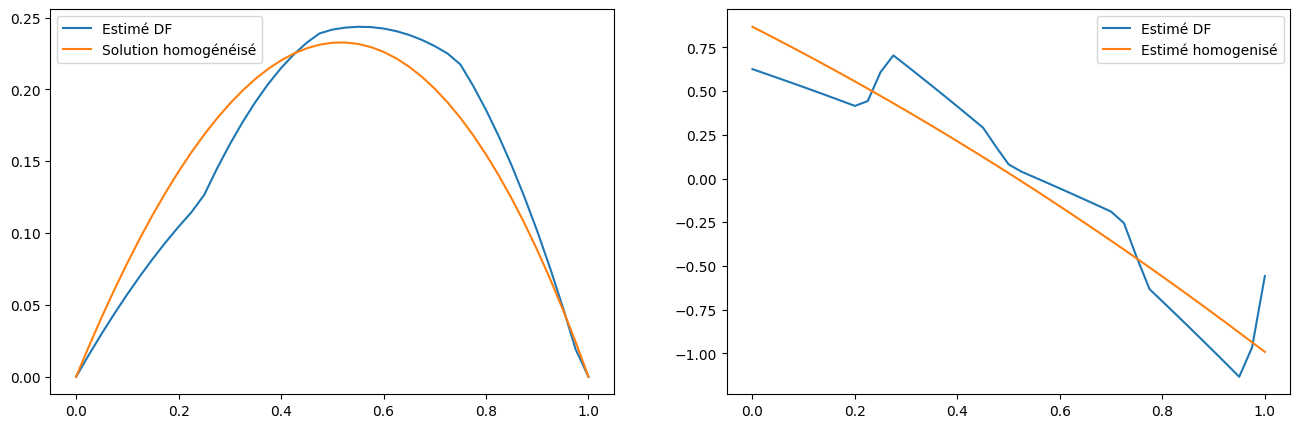

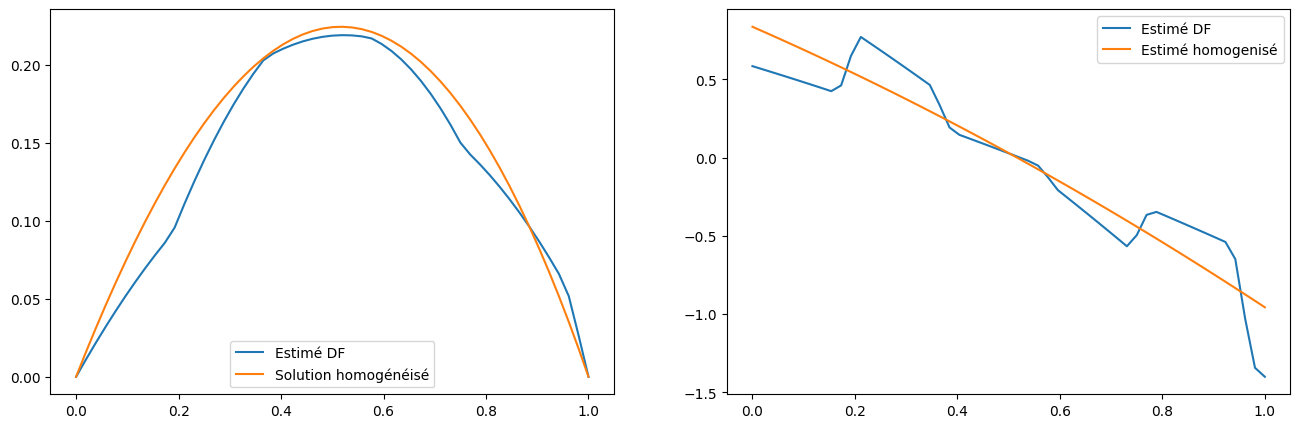

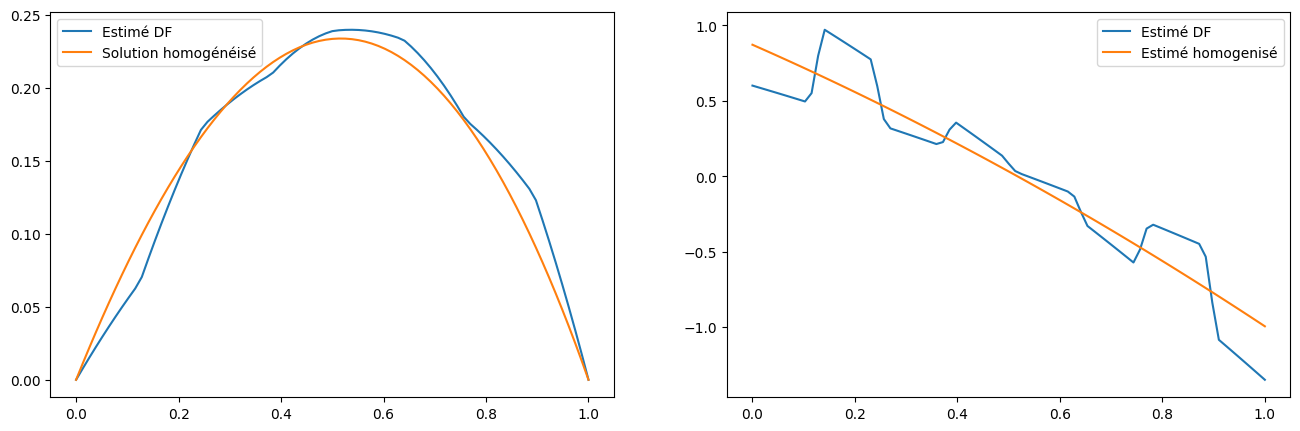

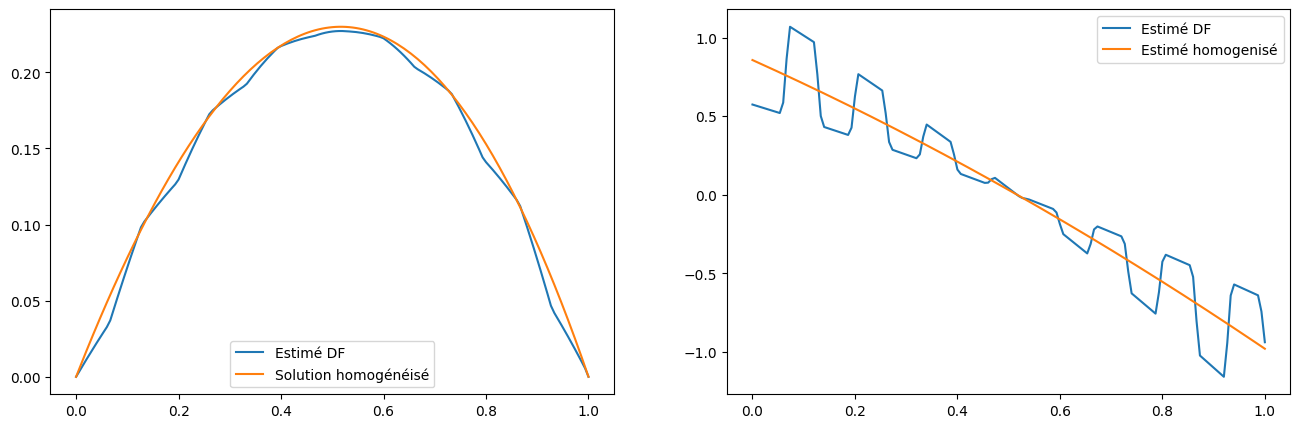

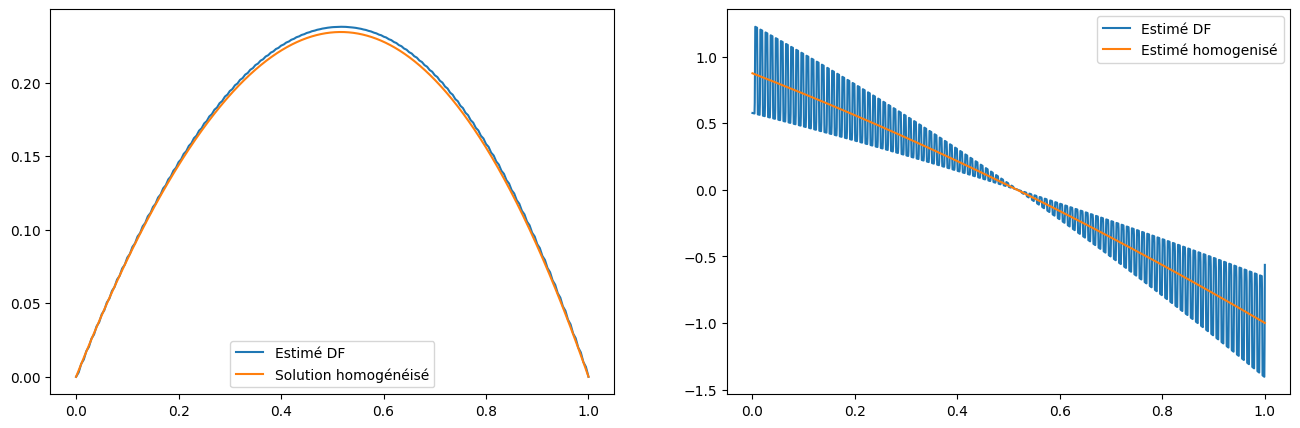

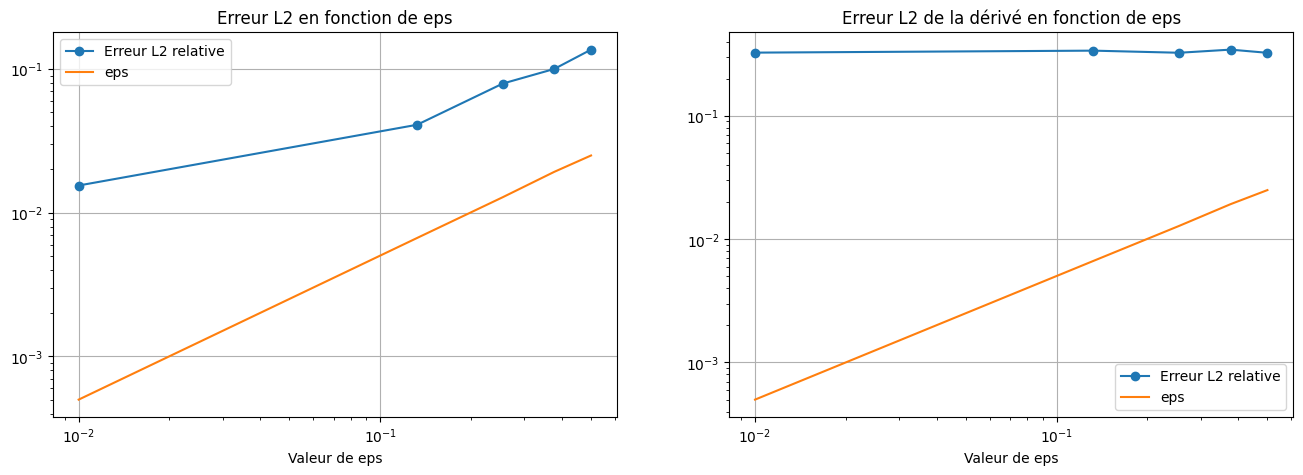

In [98]:
#k_list = np.linspace(1,3,4)
#eps_list = 10**(-k_list)
eps_list = np.linspace(0.5,10**(-2),5)
a = 0
b = 1

error_list = []
error_list_p = []
h_value = []
for eps in eps_list:
    h = eps/20
    i=np.floor(1/h).astype(int)
    X = np.linspace(a,b,i+1)
    A_eps = a_eps(X,eps)
    h = abs(X[1]-X[0])
    F = f(X)
    a_star = homogenization.compute_a_star(A_eps)
    U_homo = homogenization.DF_solve_laplacien(a_star,i,h,F)
    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_homo)
    error_list.append(err)
    h_value.append(h)

    fig = plt.figure(figsize=(16,5))
    ax = plt.subplot(1,2,1)
    ax.plot(X,U_est,label='Estimé DF')
    ax.plot(X,U_homo,label='Solution homogénéisé')
    ax.legend()

    Uprime = homogenization.compute_a_derive(U_est,h)
    Uprimeh = homogenization.compute_a_derive(U_homo,h)
    ax = plt.subplot(1,2,2)
    ax.plot(X,Uprime,label='Estimé DF')
    ax.plot(X,Uprimeh,label='Estimé homogenisé')
    ax.legend()
    plt.show()
    error_list_p.append(np.linalg.norm(Uprime - Uprimeh)/np.linalg.norm(Uprime))
    

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.loglog(eps_list, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, h_value, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 en fonction de eps')
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.loglog(eps_list, error_list_p, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, h_value, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 de la dérivé en fonction de eps')
plt.grid(True)

plt.show()

# Mise en place des correcteurs

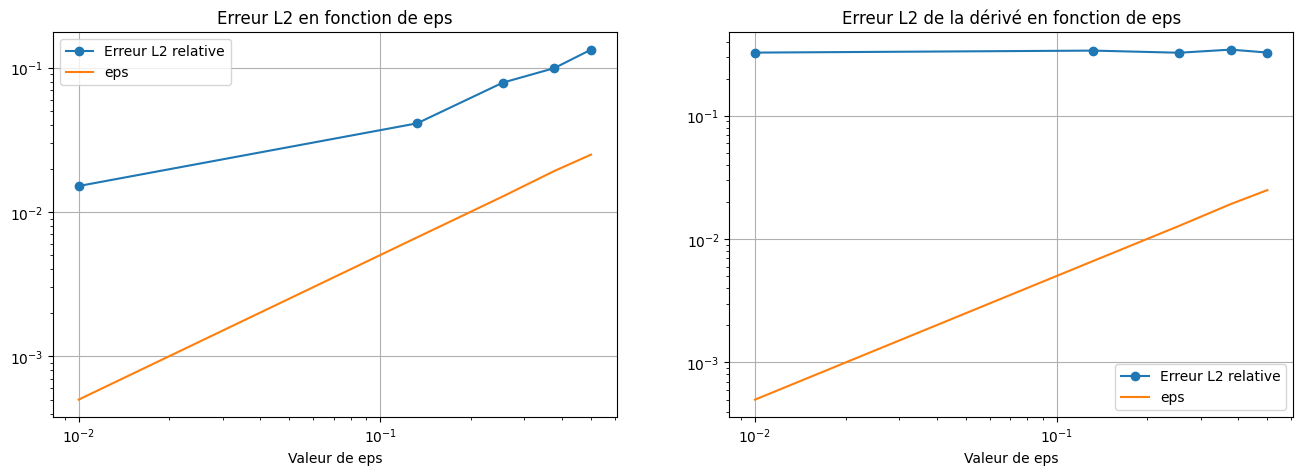

In [100]:
#k_list = np.linspace(1,3,4)
#eps_list = 10**(-k_list)
eps_list = np.linspace(0.5,10**(-2),5)
a = 0
b = 1

error_list = []
error_list_p = []
h_value = []
for eps in eps_list:
    h = eps/20
    i=np.floor(1/h).astype(int)
    X = np.linspace(a,b,i+1)
    A_eps = a_eps(X,eps)
    h = abs(X[1]-X[0])
    F = f(X)
    a_star = homogenization.compute_corrected_a(i,h,A_eps)
    U_homo = homogenization.DF_solve_laplacien(a_star,i,h,F)
    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_homo)
    error_list.append(err)
    h_value.append(h)

    Uprime = homogenization.compute_a_derive(U_est,h)
    Uprimeh = homogenization.compute_a_derive(U_homo,h)
    error_list_p.append(np.linalg.norm(Uprime - Uprimeh)/np.linalg.norm(Uprime))

    

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.loglog(eps_list, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, h_value, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 en fonction de eps')
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.loglog(eps_list, error_list_p, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, h_value, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 de la dérivé en fonction de eps')
plt.grid(True)

plt.show()

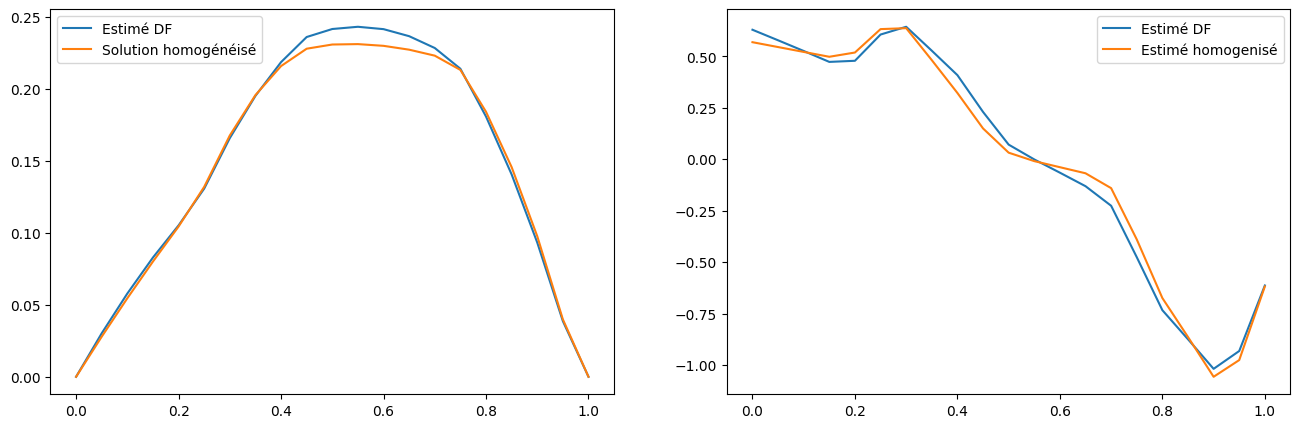

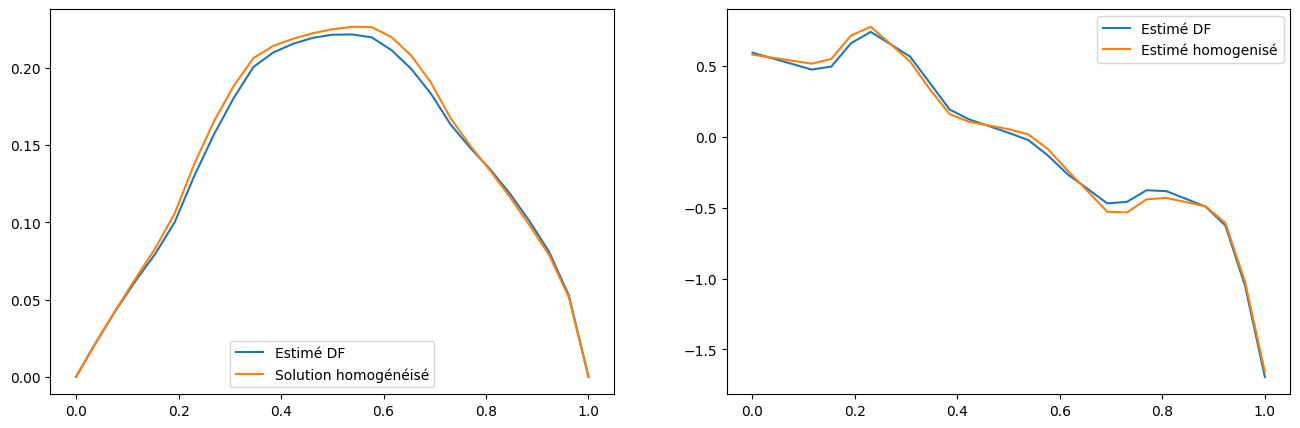

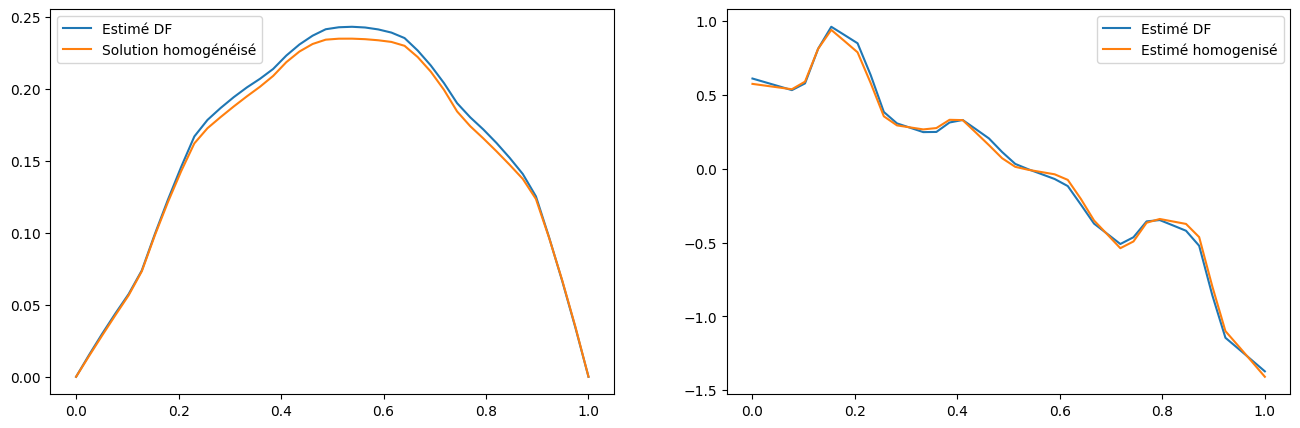

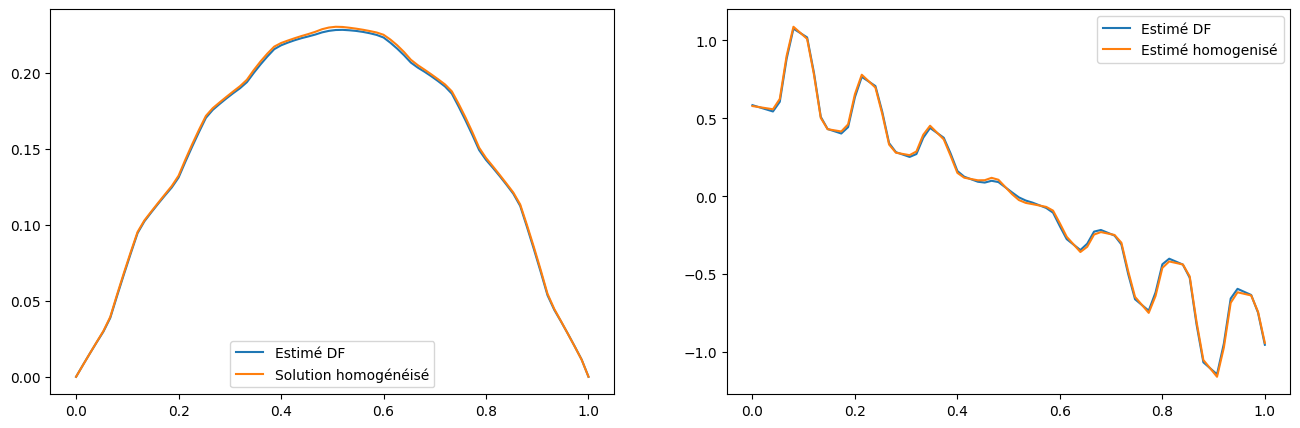

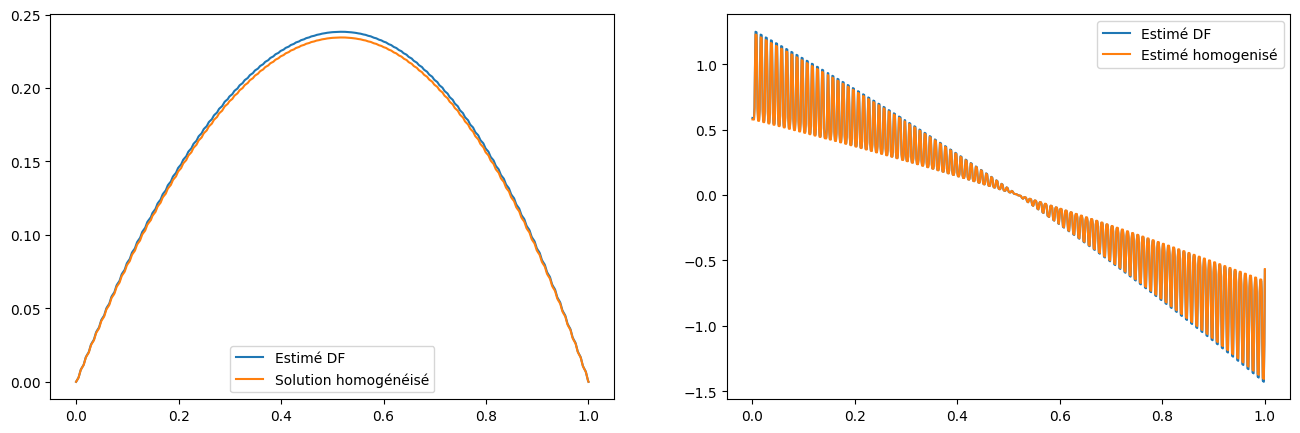

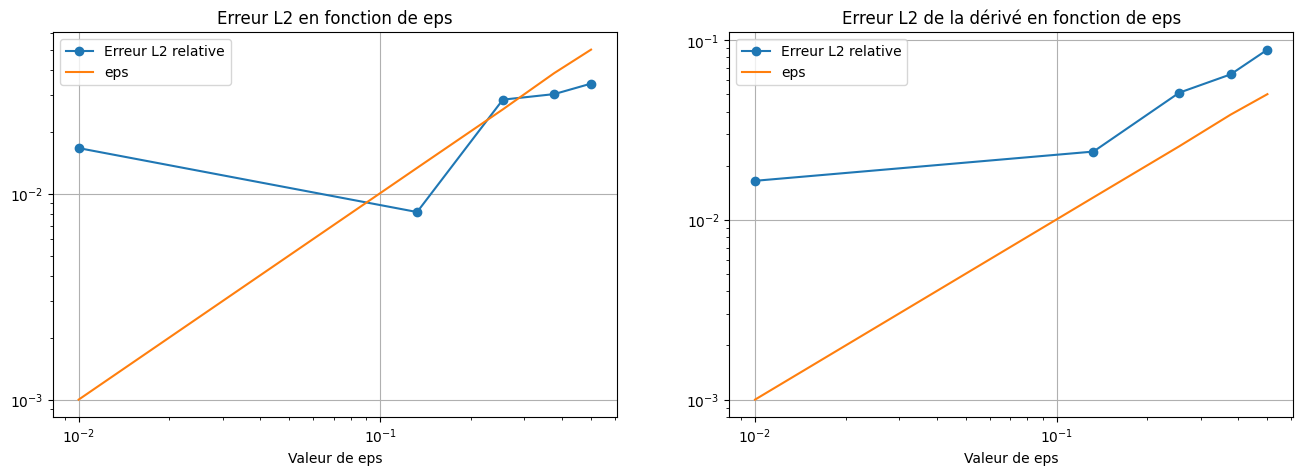

In [101]:
#k_list = np.linspace(1,3,4)
#eps_list = 10**(-k_list)
eps_list = np.linspace(0.5,10**(-2),5)
a = 0
b = 1

error_list = []
error_list_p = []
h_value = []
for eps in eps_list:
    h = eps/10
    i=np.floor(1/h).astype(int)
    X = np.linspace(a,b,i+1)
    A_eps = a_eps(X,eps)
    h = abs(X[1]-X[0])
    F = f(X)
    a_star = homogenization.compute_a_star(A_eps)
    U_homo = homogenization.DF_solve_laplacien(a_star,i,h,F)
    U_homo = U_homo + homogenization.compute_a_derive(U_homo,h)*homogenization.DF_solve_corrector(i,h,A_eps)

    U_est = homogenization.DF_solve(i,h,F,A_eps)
    err = np.linalg.norm(U_homo - U_est)/np.linalg.norm(U_homo)
    error_list.append(err)
    h_value.append(h)

    fig = plt.figure(figsize=(16,5))
    ax = plt.subplot(1,2,1)
    ax.plot(X,U_est,label='Estimé DF')
    ax.plot(X,U_homo,label='Solution homogénéisé')
    ax.legend()

    Uprime = homogenization.compute_a_derive(U_est,h)
    Uprimeh = homogenization.compute_a_derive(U_homo,h)
    ax = plt.subplot(1,2,2)
    ax.plot(X,Uprime,label='Estimé DF')
    ax.plot(X,Uprimeh,label='Estimé homogenisé')
    ax.legend()
    plt.show()
    error_list_p.append(np.linalg.norm(Uprime - Uprimeh)/np.linalg.norm(Uprime))
    

fig = plt.figure(figsize=(16,5))
ax = plt.subplot(1,2,1)
ax.loglog(eps_list, error_list, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, h_value, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 en fonction de eps')
plt.grid(True)

ax = plt.subplot(1,2,2)
ax.loglog(eps_list, error_list_p, marker='o', label='Erreur L2 relative')
ax.loglog(eps_list, h_value, label='eps')
ax.legend()
plt.xlabel('Valeur de eps')
plt.title('Erreur L2 de la dérivé en fonction de eps')
plt.grid(True)

plt.show()